In [123]:
import xarray as xr
import xmitgcm
import MITgcm_recipes
import tqdm
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [124]:
GLODAP_dir = '/local/data/artemis/observations/GLODAP_v2/originals/'

In [125]:
GLODAP_no3_ds = xr.open_mfdataset(GLODAP_dir + 'GLODAPv2.2016b.NO3.nc', decode_times=False)
GLODAP_po4_ds = xr.open_mfdataset(GLODAP_dir + 'GLODAPv2.2016b.PO4.nc', decode_times=False)
GLODAP_o2_ds = xr.open_mfdataset(GLODAP_dir + 'GLODAPv2.2016b.oxygen.nc', decode_times=False)
GLODAP_tco2_ds = xr.open_mfdataset(GLODAP_dir + 'GLODAPv2.2016b.TCO2.nc', decode_times=False)
GLODAP_sal_ds = xr.open_mfdataset(GLODAP_dir + 'GLODAPv2.2016b.salinity.nc', decode_times=False)
GLODAP_Cant_ds = xr.open_mfdataset(GLODAP_dir + 'GLODAPv2.2016b.Cant.nc', decode_times=False)
GLODAP_OA_ds = xr.open_mfdataset(GLODAP_dir + 'GLODAPv2.2016b.OmegaA.nc', decode_times=False)
GLODAP_OC_ds = xr.open_mfdataset(GLODAP_dir + 'GLODAPv2.2016b.OmegaC.nc', decode_times=False)
GLODAP_pHts25p0_ds = xr.open_mfdataset(GLODAP_dir + 'GLODAPv2.2016b.pHts25p0.nc', decode_times=False)
GLODAP_pHtsinsitutp_ds = xr.open_mfdataset(GLODAP_dir + 'GLODAPv2.2016b.pHtsinsitutp.nc', decode_times=False)
GLODAP_silicate_ds = xr.open_mfdataset(GLODAP_dir + 'GLODAPv2.2016b.silicate.nc', decode_times=False)
GLODAP_temp_ds = xr.open_mfdataset(GLODAP_dir + 'GLODAPv2.2016b.temperature.nc', decode_times=False)

In [126]:
GLODAP_no3_ds

<xarray.Dataset>
Dimensions:     (depth_surface: 33, lat: 180, lon: 360, snr: 1)
Coordinates:
  * lon         (lon) float64 20.5 21.5 22.5 23.5 ... 376.5 377.5 378.5 379.5
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: depth_surface, snr
Data variables:
    NO3         (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    NO3_error   (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    Input_mean  (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    Input_std   (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    Input_N     (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    NO3_relerr  (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    SnR         (snr) float64

In [127]:
GLODAP_temp_ds

<xarray.Dataset>
Dimensions:             (depth_surface: 33, lat: 180, lon: 360, snr: 1)
Coordinates:
  * lon                 (lon) float64 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * lat                 (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Dimensions without coordinates: depth_surface, snr
Data variables:
    temperature         (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    temperature_error   (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    Input_mean          (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    Input_std           (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    Input_N             (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    temperature_relerr  (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 

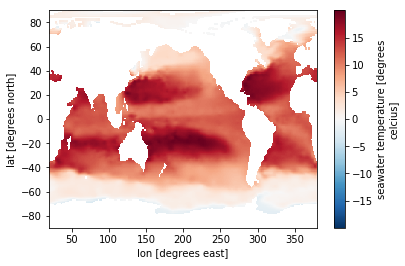

In [128]:
GLODAP_temp_ds['temperature'].sel(depth_surface=10).plot()

In [129]:
GLODAP_Cant_ds

<xarray.Dataset>
Dimensions:      (depth_surface: 33, lat: 180, lon: 360, snr: 1)
Coordinates:
  * lon          (lon) float64 20.5 21.5 22.5 23.5 ... 376.5 377.5 378.5 379.5
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: depth_surface, snr
Data variables:
    Cant         (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    Cant_error   (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    Input_mean   (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    Input_std    (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    Input_N      (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    Cant_relerr  (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    SnR          (sn

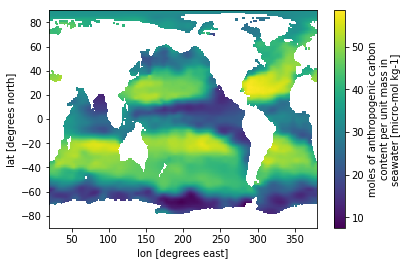

In [130]:
GLODAP_Cant_ds['Cant'].sel(depth_surface=10).plot()

In [131]:
def geo_roll_glodap_to_180(ds, londim):
    ind = (np.abs(ds[londim].values-180.)).argmin()
    ds = ds.roll(**{londim: -ind-1})
    datalon = np.mod(ds[londim].values, 360)
    datalon[np.where(datalon > 180)] -= 360
    ds[londim] = datalon
    return ds

In [132]:
GLODAP_no3_ds_180 = geo_roll_glodap_to_180(GLODAP_no3_ds, 'lon')
GLODAP_po4_ds_180 = geo_roll_glodap_to_180(GLODAP_po4_ds, 'lon')
GLODAP_o2_ds_180 = geo_roll_glodap_to_180(GLODAP_o2_ds, 'lon')
GLODAP_tco2_ds_180 = geo_roll_glodap_to_180(GLODAP_tco2_ds, 'lon')
GLODAP_sal_ds_180 = geo_roll_glodap_to_180(GLODAP_sal_ds, 'lon')
GLODAP_Cant_ds_180 = geo_roll_glodap_to_180(GLODAP_Cant_ds, 'lon')
GLODAP_OA_ds_180 = geo_roll_glodap_to_180(GLODAP_OA_ds, 'lon')
GLODAP_OC_ds_180 = geo_roll_glodap_to_180(GLODAP_OC_ds, 'lon')
GLODAP_pHts25p0_ds_180 = geo_roll_glodap_to_180(GLODAP_pHts25p0_ds, 'lon')
GLODAP_pHtsinsitutp_ds_180 = geo_roll_glodap_to_180(GLODAP_pHtsinsitutp_ds, 'lon')
GLODAP_silicate_ds_180 = geo_roll_glodap_to_180(GLODAP_silicate_ds, 'lon')
GLODAP_temp_ds_180 = geo_roll_glodap_to_180(GLODAP_temp_ds, 'lon')

In [133]:
GLODAP_OA_ds_180

<xarray.Dataset>
Dimensions:        (depth_surface: 33, lat: 180, lon: 360, snr: 1)
Coordinates:
  * lon            (lon) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * lat            (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: depth_surface, snr
Data variables:
    OmegaA         (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    OmegaA_error   (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    Input_mean     (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    Input_std      (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    Input_N        (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    OmegaA_relerr  (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    SnR

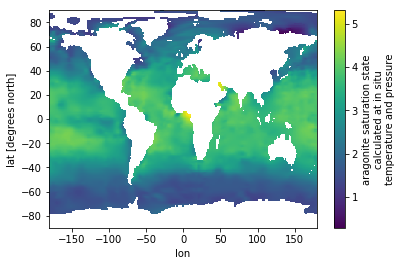

In [134]:
GLODAP_OA_ds_180['OmegaA'].sel(depth_surface=0).plot()

## ASTE Raw Grid

In [135]:
file_aste_raw = '/local/data/artemis/workspace/rdussin/ASTE/GRID/nc/aste_grid.nc'
aste_raw = xr.open_dataset(file_aste_raw)

## ASTE Output Grid

In [136]:
datadir_aste = '/local/data/artemis/workspace/rdussin/ASTE/RUNS/ASTE-Phy-Release1/outputs/'
md = xmitgcm.utils.get_extra_metadata(domain='aste', nx=270)
aste_out = xmitgcm.open_mdsdataset(datadir_aste, iters=[], prefix=['T','S','Eta','U','V'],
                                   geometry='llc', nx=270, extra_metadata=md)

## Vertical Interpolation

In [137]:
GLODAP_no3_dsz = MITgcm_recipes.vertical_interpolation(GLODAP_no3_ds_180, aste_out['Z'], ['NO3'],
                                                       lonvar='lon', latvar='lat',
                                                       depth_varin='depth_surface')

GLODAP_po4_dsz = MITgcm_recipes.vertical_interpolation(GLODAP_po4_ds_180, aste_out['Z'], ['PO4'],
                                                       lonvar='lon', latvar='lat',
                                                       depth_varin='depth_surface')

GLODAP_o2_dsz = MITgcm_recipes.vertical_interpolation(GLODAP_o2_ds_180, aste_out['Z'], ['oxygen'],
                                                       lonvar='lon', latvar='lat',
                                                       depth_varin='depth_surface')

GLODAP_tco2_dsz = MITgcm_recipes.vertical_interpolation(GLODAP_tco2_ds_180, aste_out['Z'], ['TCO2'],
                                                       lonvar='lon', latvar='lat',
                                                       depth_varin='depth_surface')

GLODAP_sal_dsz = MITgcm_recipes.vertical_interpolation(GLODAP_sal_ds_180, aste_out['Z'], ['salinity'],
                                                       lonvar='lon', latvar='lat',
                                                       depth_varin='depth_surface')

GLODAP_Cant_dsz = MITgcm_recipes.vertical_interpolation(GLODAP_Cant_ds_180, aste_out['Z'], ['Cant'],
                                                       lonvar='lon', latvar='lat',
                                                       depth_varin='depth_surface')

GLODAP_OA_dsz = MITgcm_recipes.vertical_interpolation(GLODAP_OA_ds_180, aste_out['Z'], ['OmegaA'],
                                                       lonvar='lon', latvar='lat',
                                                       depth_varin='depth_surface')

GLODAP_OC_dsz = MITgcm_recipes.vertical_interpolation(GLODAP_OC_ds_180, aste_out['Z'], ['OmegaC'],
                                                       lonvar='lon', latvar='lat',
                                                       depth_varin='depth_surface')

GLODAP_pHts25p0_dsz = MITgcm_recipes.vertical_interpolation(GLODAP_pHts25p0_ds_180, aste_out['Z'], ['pHts25p0'],
                                                       lonvar='lon', latvar='lat',
                                                       depth_varin='depth_surface')

GLODAP_pHtsinsitutp_dsz = MITgcm_recipes.vertical_interpolation(GLODAP_pHtsinsitutp_ds_180, aste_out['Z'], ['pHtsinsitutp'],
                                                       lonvar='lon', latvar='lat',
                                                       depth_varin='depth_surface')

GLODAP_silicate_dsz = MITgcm_recipes.vertical_interpolation(GLODAP_silicate_ds_180, aste_out['Z'], ['silicate'],
                                                       lonvar='lon', latvar='lat',
                                                       depth_varin='depth_surface')

GLODAP_temp_dsz = MITgcm_recipes.vertical_interpolation(GLODAP_temp_ds_180, aste_out['Z'], ['temperature'],
                                                       lonvar='lon', latvar='lat',
                                                       depth_varin='depth_surface')

## Regridding

In [147]:
GLODAP_no3_aste = MITgcm_recipes.regridding.regrid_2_mitgcm_llc(GLODAP_no3_dsz, aste_raw, ['NO3'], 
                                                                 method='bilinear',
                                                                 lonname='lon', latname='lat', point='T', 
                                                                 periodic=True, reuse_weights=True,
                                                                 regridname='GLODAP_1deg_aste_face')

GLODAP_po4_aste = MITgcm_recipes.regridding.regrid_2_mitgcm_llc(GLODAP_po4_dsz, aste_raw, ['PO4'], 
                                                                 method='bilinear',
                                                                 lonname='lon', latname='lat', point='T', 
                                                                 periodic=True, reuse_weights=True,
                                                                 regridname='GLODAP_1deg_aste_face')

GLODAP_o2_aste = MITgcm_recipes.regridding.regrid_2_mitgcm_llc(GLODAP_o2_dsz, aste_raw, ['oxygen'], 
                                                                 method='bilinear',
                                                                 lonname='lon', latname='lat', point='T', 
                                                                 periodic=True, reuse_weights=True,
                                                                 regridname='GLODAP_1deg_aste_face')

GLODAP_tco2_aste = MITgcm_recipes.regridding.regrid_2_mitgcm_llc(GLODAP_tco2_dsz, aste_raw, ['TCO2'], 
                                                                 method='bilinear',
                                                                 lonname='lon', latname='lat', point='T', 
                                                                 periodic=True, reuse_weights=True,
                                                                 regridname='GLODAP_1deg_aste_face')

GLODAP_sal_aste = MITgcm_recipes.regridding.regrid_2_mitgcm_llc(GLODAP_sal_dsz, aste_raw, ['salinity'], 
                                                                 method='bilinear',
                                                                 lonname='lon', latname='lat', point='T', 
                                                                 periodic=True, reuse_weights=True,
                                                                 regridname='GLODAP_1deg_aste_face')

GLODAP_Cant_aste = MITgcm_recipes.regridding.regrid_2_mitgcm_llc(GLODAP_Cant_dsz, aste_raw, ['Cant'], 
                                                                 method='bilinear',
                                                                 lonname='lon', latname='lat', point='T', 
                                                                 periodic=True, reuse_weights=True,
                                                                 regridname='GLODAP_1deg_aste_face')

GLODAP_OA_aste = MITgcm_recipes.regridding.regrid_2_mitgcm_llc(GLODAP_OA_dsz, aste_raw, ['OmegaA'], 
                                                                 method='bilinear',
                                                                 lonname='lon', latname='lat', point='T', 
                                                                 periodic=True, reuse_weights=True,
                                                                 regridname='GLODAP_1deg_aste_face')

GLODAP_OC_aste = MITgcm_recipes.regridding.regrid_2_mitgcm_llc(GLODAP_OC_dsz, aste_raw, ['OmegaC'], 
                                                                 method='bilinear',
                                                                 lonname='lon', latname='lat', point='T', 
                                                                 periodic=True, reuse_weights=True,
                                                                 regridname='GLODAP_1deg_aste_face')

GLODAP_pHts25p0_aste = MITgcm_recipes.regridding.regrid_2_mitgcm_llc(GLODAP_pHts25p0_dsz, aste_raw, ['pHts25p0'], 
                                                                 method='bilinear',
                                                                 lonname='lon', latname='lat', point='T', 
                                                                 periodic=True, reuse_weights=True,
                                                                 regridname='GLODAP_1deg_aste_face')

GLODAP_pHtsinsitutp_aste = MITgcm_recipes.regridding.regrid_2_mitgcm_llc(GLODAP_pHtsinsitutp_dsz, aste_raw, ['pHtsinsitutp'], 
                                                                 method='bilinear',
                                                                 lonname='lon', latname='lat', point='T', 
                                                                 periodic=True, reuse_weights=True,
                                                                 regridname='GLODAP_1deg_aste_face')

GLODAP_silicate_aste = MITgcm_recipes.regridding.regrid_2_mitgcm_llc(GLODAP_silicate_dsz, aste_raw, ['silicate'], 
                                                                 method='bilinear',
                                                                 lonname='lon', latname='lat', point='T', 
                                                                 periodic=True, reuse_weights=True,
                                                                 regridname='GLODAP_1deg_aste_face')

GLODAP_temp_aste = MITgcm_recipes.regridding.regrid_2_mitgcm_llc(GLODAP_temp_dsz, aste_raw, ['temperature'], 
                                                                 method='bilinear',
                                                                 lonname='lon', latname='lat', point='T', 
                                                                 periodic=True, reuse_weights=True,
                                                                 regridname='GLODAP_1deg_aste_face')

Reuse existing file: GLODAP_1deg_aste_face0.nc
Reuse existing file: GLODAP_1deg_aste_face1.nc
Reuse existing file: GLODAP_1deg_aste_face2.nc
Reuse existing file: GLODAP_1deg_aste_face3.nc
Reuse existing file: GLODAP_1deg_aste_face4.nc
Reuse existing file: GLODAP_1deg_aste_face5.nc
Reuse existing file: GLODAP_1deg_aste_face0.nc
Reuse existing file: GLODAP_1deg_aste_face1.nc
Reuse existing file: GLODAP_1deg_aste_face2.nc
Reuse existing file: GLODAP_1deg_aste_face3.nc
Reuse existing file: GLODAP_1deg_aste_face4.nc
Reuse existing file: GLODAP_1deg_aste_face5.nc
Reuse existing file: GLODAP_1deg_aste_face0.nc
Reuse existing file: GLODAP_1deg_aste_face1.nc
Reuse existing file: GLODAP_1deg_aste_face2.nc
Reuse existing file: GLODAP_1deg_aste_face3.nc
Reuse existing file: GLODAP_1deg_aste_face4.nc
Reuse existing file: GLODAP_1deg_aste_face5.nc
Reuse existing file: GLODAP_1deg_aste_face0.nc
Reuse existing file: GLODAP_1deg_aste_face1.nc
Reuse existing file: GLODAP_1deg_aste_face2.nc
Reuse existin

## Check results

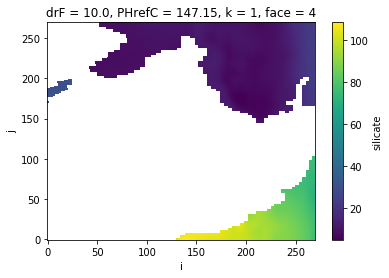

In [155]:
GLODAP_silicate_aste['silicate'].isel(face=4, k=1).plot()